In [1]:
import sys
sys.dont_write_bytecode = True

# for debug print
def chkprint(*args):
    from inspect import currentframe
    names = {id(v):k for k,v in currentframe().f_back.f_locals.items()}
    print(', '.join(names.get(id(arg),'???')+' : '+str(type(arg))+' = '+repr(arg) for arg in args))

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

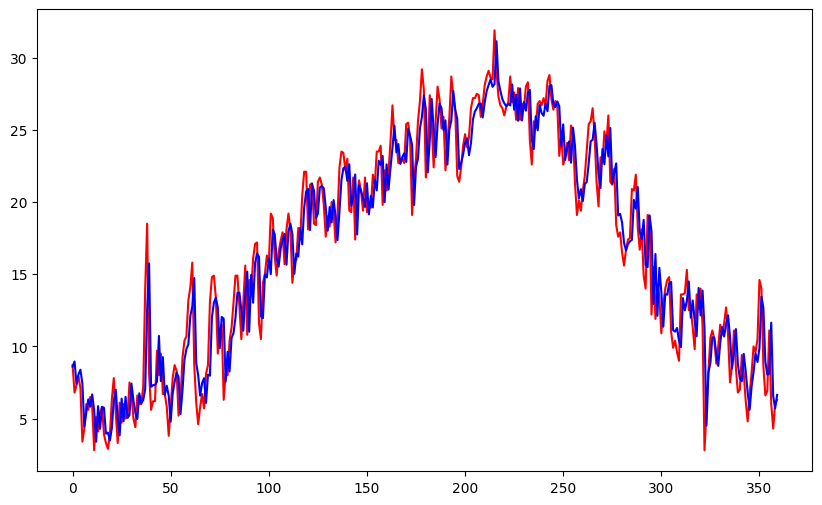

In [3]:
# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する ---(*1)
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

# 過去6日分を学習するデータを作成 ---(*2)
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression()
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

In [4]:
pre_y - test_y

array([-0.10002007,  2.15225572,  0.10256015,  0.15142234,  1.28187488,
        4.01365434,  0.13671099, -0.56975101,  0.72603441, -0.68140458,
        0.87244611,  2.7607466 , -1.70903185,  1.75737089, -1.11231561,
        0.01187698,  1.83773828,  0.65039859,  1.12591734, -0.32619115,
       -1.97861532, -1.57885621,  1.59928286,  1.72686513, -2.27163088,
        1.68023609, -1.18539052,  1.50001243, -0.05121848, -2.25973761,
        0.72214703,  1.27944462,  0.98314343, -1.63017942,  0.74598537,
        0.06470342, -0.92896962, -6.94975005, -5.93966138,  7.65213866,
        1.595504  ,  1.11502761,  1.11392207, -2.14812766,  2.7258388 ,
       -1.9074255 ,  2.55773688, -0.06004565,  1.47215308,  2.75437918,
       -1.01277685, -1.07156242, -1.15714278, -0.1103171 ,  2.66758147,
       -0.98676704, -2.27801803, -1.34517563, -0.89701271, -3.05874001,
       -2.0044005 , -3.03635208,  6.03314611,  2.75256234,  3.40484054,
        0.78378786,  0.7571854 ,  2.09606982, -2.02017163, -0.65

In [5]:
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max", max(diff_y))

average= 1.664068497195424
max 8.471949619908475
